<a href="https://colab.research.google.com/github/alirezakhaleghianaghizi/ml_1401/blob/main/ch2q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

تمرین کامپیوتری یادگیری ماشین 

علیرضا خالقی آناقیزی

99101462

تمرین2

Problem C3

در زیر ما فایل مورد نظر را در درایو گوگل آپلود کرده ایم و برای این که دیتا ها را لود کنیم ابتدا باید درایو را به سیستم متصل کنیم و سپس از فولدری که 

path

مورد نظر میباشد آن را لود کنیم.

In [97]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


A. Load Data

In [98]:
filepath='/content/drive/MyDrive/ml/data_banknote_authentication.csv' 
df = pd.read_csv(filepath)
print(df.to_string()) 

      feature 1  feature 2  feature 3  feature 4  label
0     -1.710400  -4.778000   6.210900   0.397400      1
1      3.763500   2.781100   0.661190   0.341790      1
2      5.391500   9.994600  -3.808100  -3.364200     -1
3     -1.834300  -6.590700   5.642900   0.549980      1
4      3.535800   6.708600  -0.818570   0.478860      1
5      4.676500  -3.389500   3.489600   1.477100      1
6     -0.817200   3.381200  -3.668400  -3.456000     -1
7      1.547800   9.181400  -1.632600  -1.737500     -1
8     -0.362790   8.289500  -1.921300  -3.333200     -1
9      3.952900  -2.354800   2.379200   0.482740      1
10     0.895660   7.776300  -2.747300  -1.935300     -1
11    -1.942300   0.376600  -1.289800  -0.824580     -1
12     3.155700   2.890800   0.596930   0.798250      1
13    -1.505500   0.070346   6.868100  -0.506480     -1
14     0.508130   0.477990  -1.980400   0.577140      1
15     3.466300   1.111200   1.742500   1.338800      1
16    -2.659000  -1.605800   1.364700   0.164640

In [100]:
dataset=np.array(df).T


In [101]:
print(len(dataset))

5


In [102]:
X=dataset[0:len(dataset)-1].T
print(X)
Y=dataset[len(dataset)-1].T
print(Y)

[[-1.7104  -4.778    6.2109   0.3974 ]
 [ 3.7635   2.7811   0.66119  0.34179]
 [ 5.3915   9.9946  -3.8081  -3.3642 ]
 ...
 [-3.6053  -5.974   10.0916  -0.82846]
 [ 2.0421   1.2436   4.2171   0.90429]
 [ 1.9476  -4.7738   8.527   -1.8668 ]]
[ 1.  1. -1. ... -1.  1. -1.]


In [136]:
import math
X_train=np.array(X[0:math.floor(0.8*len(X))])
Y_train=np.array(Y[0:math.floor(0.8*len(X))])

X_test=np.array(X[math.floor(0.8*len(X)):len(X)])
Y_test=np.array(Y[math.floor(0.8*len(X)):len(X)])

B. Perceptron Algorithm


دلیل اضافه کردن این یک برای این است که در رابطه خطی رابطه را به صورت همگن در بیاوریم و مقدار ثابت 

b

 را به عنوان یکی از ضرایب خطی سازی در نظر بگیریم و بگوییم هر مشخصه یک مقدار 1 دارد که در ضریبش ضرب شده و مقدار ثابت را میسازد.

In [137]:
x0train=np.array(np.ones(len(X_train)))
x0test=np.array(np.ones(len(X_test)))
X_train1= np.append([x0train],X_train.T,axis=0)
X_test1=np.append([x0test],X_test.T,axis=0)
X_train1tra=np.array(X_train1).T
X_test1tra=np.array(X_test1).T

حالا تابعی مینویسیم برای الگوریتم تکراری

در زیر ما سه تابع نوشتیم که اولی هر گام را انجام میدهد و ضرایب جدید را میسازد و دومی خطا را حساب میکند و سومی نیز تابع کلی است که 50000 بار تکرار میکند

In [119]:
def perceptronN(w,y,x):
  h=np.dot(w,x)
  xtr=np.array(x).T
  wt1=w
  for i in range(len(h)):
    if h[i]*y[i]<=0:
      wt1=np.add(wt1,y[i]*xtr[i])
  return (wt1)

def calLsn(w,y,x):
  M=(len(x[0]))
  h=np.dot(w,x)
  sum=0
  for i in range(M):
     if h[i]*y[i]<=0:
      sum=sum+1
  L=sum/M 
  #print("L"+str(len(x)))
  #print(L) 
  #print("max"+str(len(x)))
  #print(max)
  return (L)

def perceptron(X_tr, Y_tr, X_te, Y_te, max_iter=50000):
  xtra=np.array(X_tr).T
  w=abs(xtra[0]*0);
  loss_history=[]
  for i in range(max_iter):
    w=perceptronN(w,Y_tr,X_tr)
    if i%500==0:
      Loss=calLsn(w,Y_te, X_te)
      loss_history.append(Loss)
  return w,loss_history

w,loss_history=perceptron(X_train1,Y_train,X_test1,Y_test)
print(w)
print(loss_history)

[1763.          800.1181336  -435.25372948  153.08152479 5112.63114089]
[0.18545454545454546, 0.014545454545454545, 0.02909090909090909, 0.01090909090909091, 0.01090909090909091, 0.02909090909090909, 0.02909090909090909, 0.01818181818181818, 0.014545454545454545, 0.01090909090909091, 0.014545454545454545, 0.01090909090909091, 0.02909090909090909, 0.02909090909090909, 0.014545454545454545, 0.02909090909090909, 0.02909090909090909, 0.014545454545454545, 0.014545454545454545, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.02909090909090909, 0.014545454545454545, 0.02909090909090909, 0.014545454545454545, 0.01090909090909091, 0.01090909090909091, 0.02909090909090909, 0.02909090909090909, 0.02909090909090909, 0.02909090909090909, 0.02909090909090909, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.01818181818181818, 0.014545454545454545, 0.02909090909090909, 0.01818181818181818, 0.0290909090

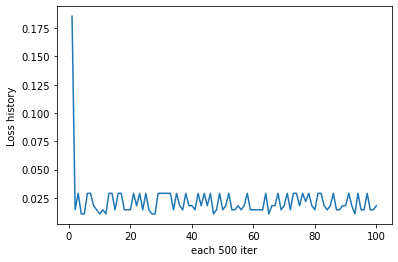

0.01818181818181818


In [120]:
finalloss=loss_history[len(loss_history)-1]
import matplotlib.pyplot as plt
xaxis=[]
for i in range(len(loss_history)):
  xaxis.append((i+1))
xpoints = np.array(xaxis)
ypoints = np.array(loss_history)
plt.xlabel("each 500 iter")
plt.ylabel("Loss history")
plt.plot(xpoints, ypoints)
plt.show()
print(finalloss)

C. Generalize to non-linear classification

حالا کافی است یک ستون که توان سه ستون چهارم است را اضافه کنیم

In [138]:
Xtr2=X_train1
Xtr3=X_test1
xtr43=X_train1[len(X_train1)-1]*0
for i in range(len(xtr43)):
  xtr43[i]=math.pow(X_train1[len(X_train1)-1][i],3)
xte43=X_test1[len(X_test1)-1]*0
for i in range(len(xte43)):
  xte43[i]=math.pow(X_test1[len(X_test1)-1][i],3)


spi_tr= np.append(Xtr2,[xtr43],axis=0)
spi_te= np.append(Xtr3,[xte43],axis=0)
print(spi_tr)
print(spi_te)

[[  1.           1.           1.         ...   1.           1.
    1.        ]
 [ -1.7104       3.7635       5.3915     ...   2.483       -0.49241
    2.6415    ]
 [ -4.778        2.7811       9.9946     ...   6.6155       0.89392
    7.586     ]
 [  6.2109       0.66119     -3.8081     ...  -0.79287     -1.6283
   -0.28562   ]
 [  0.3974       0.34179     -3.3642     ...  -0.90863     -0.56854
   -1.6677    ]
 [  0.06276009   0.03992805 -38.07548285 ...  -0.75017263  -0.18377358
   -4.63824608]]
[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-2.66490000e+00  3.80270000e+00  3.83840000e+00 ... -3.60530000e+00
   2.04210000e+00  1.94760000e+00]
 [-1.28130000e+01  8.15290000e-01  6.18510000e+00 ... -5.97400000e+00
   1.24360000e+00 -4.77380000e+00]
 [ 1.26689000e+01  2.10410000e+00 -2.04390000e+00 ...  1.00916000e+01
   4.21710000e+00  8.52700000e+00]
 [-1.90820000e+00  1.02450000e+00 -3.32040000e-02 ... -8.28460000e-01
   9.042

حال که ستون جدید را ساختیم تابع گام را صدا میزنیم

In [139]:
wnew,loss_historynew=perceptron(spi_tr,Y_train,spi_te,Y_test)
print(wnew)
print(loss_historynew)

[ 6471.          3630.5162982  -2117.76209248   579.67791579
 16088.92727748  4027.91864132]
[0.10909090909090909, 0.03272727272727273, 0.02909090909090909, 0.025454545454545455, 0.025454545454545455, 0.02181818181818182, 0.02181818181818182, 0.01818181818181818, 0.014545454545454545, 0.01818181818181818, 0.014545454545454545, 0.01090909090909091, 0.01090909090909091, 0.01090909090909091, 0.01090909090909091, 0.01090909090909091, 0.01090909090909091, 0.01090909090909091, 0.01090909090909091, 0.007272727272727273, 0.0036363636363636364, 0.0036363636363636364, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


خطای حاصل را در زیر رسم میکنیم

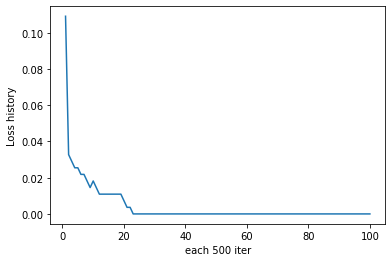

0.0


In [140]:
finallossnew=loss_historynew[len(loss_historynew)-1]
import matplotlib.pyplot as plt
xaxis=[]
for i in range(len(loss_historynew)):
  xaxis.append((i+1))
xpoints = np.array(xaxis)
ypoints = np.array(loss_historynew)
plt.xlabel("each 500 iter")
plt.ylabel("Loss history")
plt.plot(xpoints, ypoints)
plt.show()
print(finallossnew)

در حالت اولیه که سطر توان سه ویژگی چهارم را نداشتیم خطا هر گز صفر نمیشد اما ر اینجا خطا از یک گامی به بعد صفر شده است